In [83]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [84]:
! pip install nltk
! pip install wordcloud

In [85]:
# NLP packages
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

In [86]:
# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [87]:
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')

In [88]:
people = pd.read_csv(r"people_wiki.csv")

In [89]:
people.head()

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


# Explore data

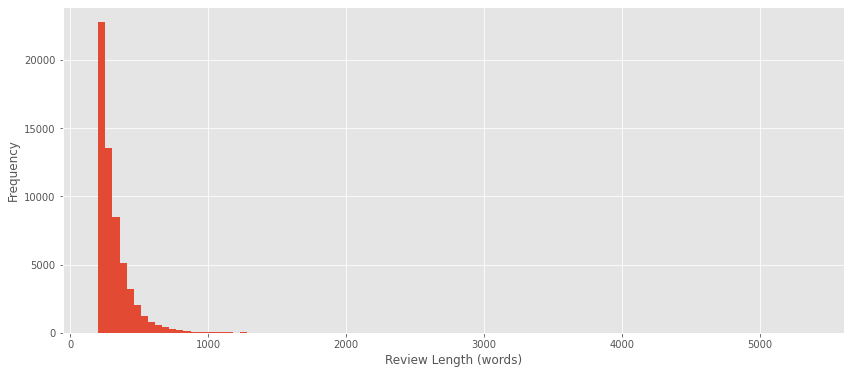

In [90]:
## Getting the number of words by splitting them by a space
words_per_review = people.text.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()

In [91]:
print('Average words:', words_per_review.mean())
print('Skewness:', words_per_review.skew())

Average words: 314.77650623825565
Skewness: 4.666306926758527


# Text visualization using word clouds (word clouds )

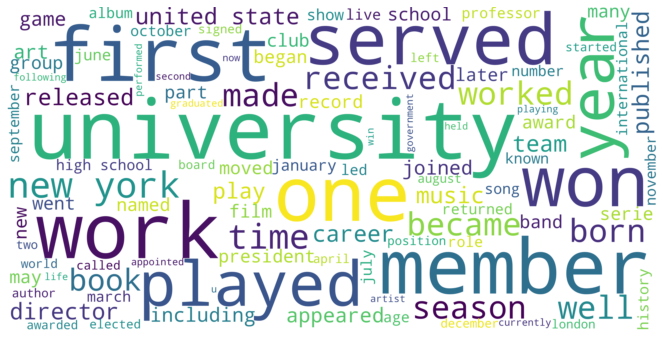

In [10]:
word_cloud_text = ''.join(people['text'])

wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud, 
           interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.show()

## Taking a look at the entry for President Obama

In [92]:
obama = people[people['name'] == 'Barack Obama']
obama['text']

35817    barack hussein obama ii brk husen bm born augu...
Name: text, dtype: object

## Explore the entry for actor George Clooney

In [93]:
clooney = people[people['name'] == 'George Clooney']
clooney['text']

38514    george timothy clooney born may 6 1961 is an a...
Name: text, dtype: object

# Word counts for Obama acticle

In [157]:
from collections import Counter
word_counts = Counter(nltk.word_tokenize(obama.text.item()))

In [159]:
obama_word_count_table = pd.DataFrame(word_counts.values(), index=word_counts.keys(), columns=['count'])
obama_word_count_table.index.name = 'word'

In [160]:
obama_word_count_table.sort_values(by='count', ascending=False)

,count
word,
the,40
in,30
and,21
of,18
to,14
...,...
laureateduring,1
two,1
years,1


# Cleaning the 'text' column before creating tf-idf vector

In [99]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\shrey\AppData\Local\Temp\pip-req-build-yxnjen16'

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\shrey\appdata\local\temp\pip-req-build-yxnjen16


  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-cp37-none-any.whl size=7679 sha256=9000ba2cc02492ad14143a68400242c294e2de9eeaca977296884637e09a81e0
  Stored in directory: C:\Users\shrey\AppData\Local\Temp\pip-ephem-wheel-cache-zy103qm5\wheels\a8\18\22\90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie
  Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


In [100]:
import preprocess_kgptalkie as ps
import re

def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    #x = ps.cont_exp(x)
    #x = ps.remove_emails(x)
    #x = ps.remove_urls(x)
    #x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [101]:
people['text'] = people['text'].apply(lambda x: get_clean(x))   # Text column cleaned.

# TFIDF vectorizer and transformation

In [118]:
tfidf = TfidfVectorizer()

In [119]:
people['tfidf'] = tfidf.fit_transform(people['text'])

# Apply nearest neighbors for retrieval of Wikipedia articles

## Build the kNN model

In [121]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [122]:
x = people['text']
y = people['name']

In [123]:
x = tfidf.fit_transform(x)
knn_model.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [124]:
people.head()

,URI,name,text,tfidf
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,"(0, 322447)\t0.049445056188722525\n (0, 130..."
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,"(0, 322447)\t0.049445056188722525\n (0, 130..."
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...,"(0, 322447)\t0.049445056188722525\n (0, 130..."
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...,"(0, 322447)\t0.049445056188722525\n (0, 130..."
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...,"(0, 322447)\t0.049445056188722525\n (0, 130..."


In [126]:
#pd.DataFrame(data = x.toarray().flatten(), index= tfidf.get_feature_names(), columns=['tfidf']).sort_values('tfidf', ascending=False)

## Use model for retrieval... for example, who is closest to Obama?

In [141]:
Barack_Obama = people[people['name'] == 'Barack Obama'].index.values.astype(int)

In [142]:
Bill_Clinton = people[people['name'] == 'Bill Clinton'].index.values.astype(int)

In [149]:
def five_neighbours(idx):
    distance, indices = knn_model.kneighbors(x[[idx[0]]], n_neighbors = 5)
    return people.iloc[indices[0], [1]]

In [150]:
five_neighbours(Barack_Obama)

,name
35817,Barack Obama
24478,Joe Biden
57108,Hillary Rodham Clinton
38376,Samantha Power
38714,Eric Stern (politician)


## Other examples of retrieval

In [151]:
swift = people[people['name'] == 'Taylor Swift'].index.values.astype(int)

In [152]:
five_neighbours(swift)

,name
54264,Taylor Swift
317,Carrie Underwood
27793,Adele
29297,Kelly Clarkson
1341,Dolly Parton


In [153]:
jolie = people[people['name'] == 'Angelina Jolie'].index.values.astype(int)

In [154]:
five_neighbours(jolie)

,name
39521,Angelina Jolie
29009,Barbara Hershey
57434,Glenn Close
34756,Maggie Smith
44992,Julianne Moore


In [155]:
arnold = people[people['name'] == 'Arnold Schwarzenegger'].index.values.astype(int)

In [156]:
five_neighbours(arnold)

,name
16018,Arnold Schwarzenegger
35293,Paul Grant (bodybuilder)
58965,Bonnie Garcia
36682,Abel Maldonado
10499,David Israel


# To calculate the Cosine similarities between 2 observations manually. In this case, the lower the distance is, the closer they are!

In [143]:
from sklearn.metrics.pairwise import cosine_distances

# Obama and Bill Clinton
cosine_distances(x[int((Barack_Obama.squeeze()))], x[int((Bill_Clinton.squeeze()))])

array([[0.67376873]])

In [144]:
# Obama and Taylor Swift
cosine_distances(x[int((Barack_Obama.squeeze()))], x[int((swift.squeeze()))])

array([[0.84573047]])

In [145]:
# Arnold and Jolie
cosine_distances(x[int((arnold.squeeze()))], x[int((jolie.squeeze()))])

array([[0.90581091]])